# Customer Churn — Initial EDA Notebook

This notebook reflects the **first exploration** stage before modularizing into `src/`.
It loads the raw dataset, inspects structure, visualizes distributions, and explores
relationships with the churn target.


## 1. Setup

In [1]:
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RAW = Path('../data/raw/Customer-Churn.csv')
RAW

WindowsPath('../data/raw/Customer-Churn.csv')

## 2. Load data

In [2]:
df = pd.read_csv(RAW)
print(df.shape)
df.head(10)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## 3. Structure and completeness

In [7]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [8]:
print('\nDtypes:')
print(df.dtypes)


Dtypes:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observation:** 

- `TotalCharges` should be float64 but it is object type means it contains characters which we need to deal with.

In [6]:
print('\nMissing values (top 20):')
print(df.isna().sum().sort_values(ascending=False).head(20))


Missing values (top 20):
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


## 4. Target distribution

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Share:
Churn
No     73.46%
Yes    26.54%
Name: proportion, dtype: object


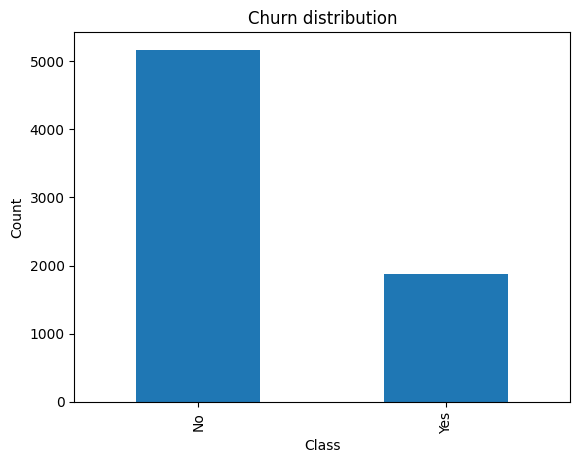

In [10]:
target = 'Churn'
print(df[target].value_counts())
print('\nShare:')
print((df[target].value_counts(normalize=True) * 100).round(2).astype(str) + '%')

plt.figure()
df[target].astype(str).value_counts().plot(kind='bar')
plt.title('Churn distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**Observation:** 

- The churn classes are heavily imbalanced.  
- Most customers did not churn, while only a smaller portion did.  
- This imbalance can bias the model toward predicting the majority class, so we must apply class-balancing techniques (e.g., `scale_pos_weight`, SMOTE, or stratified sampling) during training.


## 5. Quick cleanup for EDA only
- Convert `TotalCharges` to numeric to avoid issues in plots and stats.
- No encoder or scaler is saved here.


In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


## 6. Missing values

In [12]:
na = df.isna().sum()
na = na[na > 0].sort_values(ascending=False)
if not na.empty:
    plt.figure()
    na.plot(kind='bar')
    plt.title('Missing values per column')
    plt.ylabel('Count')
    plt.show()
else:
    print('No missing values detected.')

No missing values detected.


## 7. Numeric feature distributions

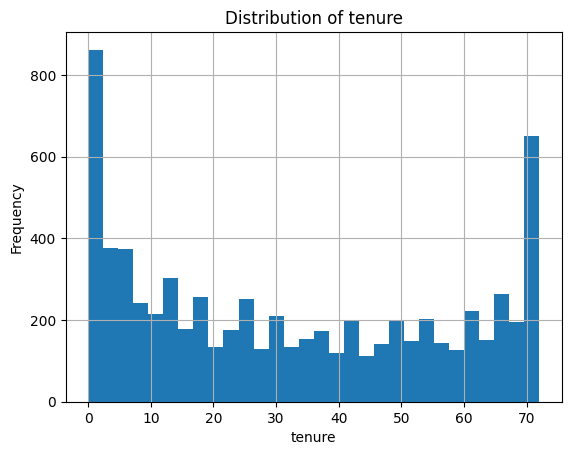

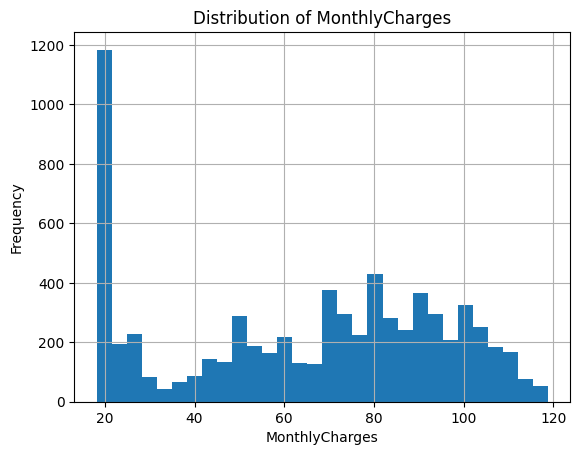

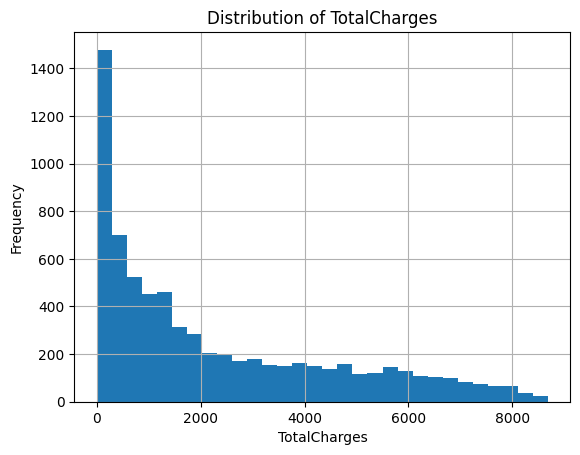

In [13]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for c in num_cols:
    if c in df.columns:
        plt.figure()
        df[c].dropna().hist(bins=30)
        plt.title(f'Distribution of {c}')
        plt.xlabel(c)
        plt.ylabel('Frequency')
        plt.show()

## 8. Churn rate by key categories

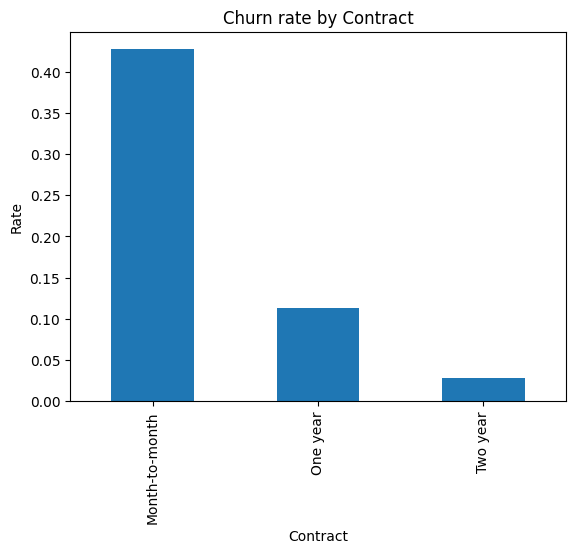

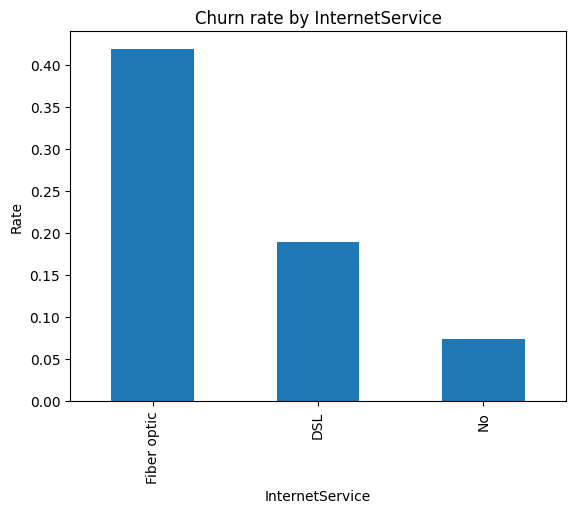

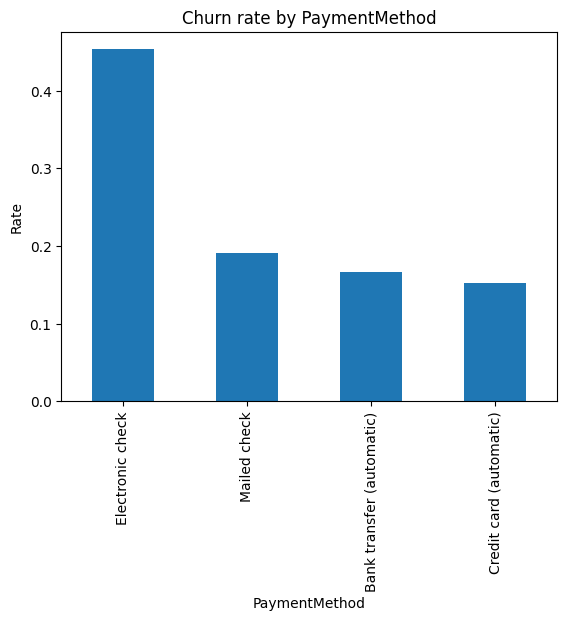

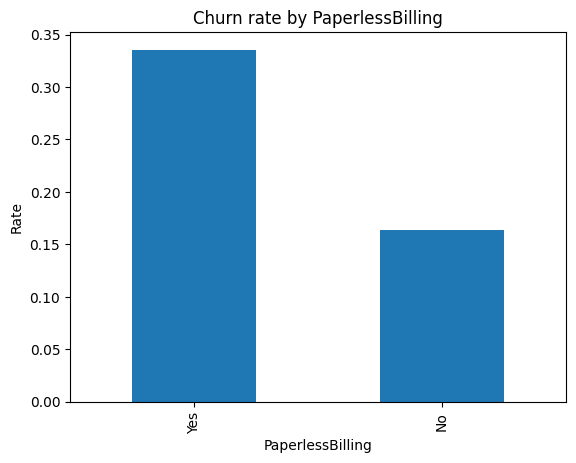

In [14]:
def churn_rate_by(col):
    if col not in df.columns:
        return None
    tmp = df[[col, 'Churn']].copy()
    tmp['ChurnBin'] = tmp['Churn'].astype(str).str.lower().isin(['yes','1', 'true'])
    rates = tmp.groupby(col)['ChurnBin'].mean().sort_values(ascending=False)
    return rates

for c in ['Contract','InternetService','PaymentMethod','PaperlessBilling']:
    rates = churn_rate_by(c)
    if rates is not None:
        plt.figure()
        rates.plot(kind='bar')
        plt.title(f'Churn rate by {c}')
        plt.ylabel('Rate')
        plt.xlabel(c)
        plt.show()

## 9. Correlation heatmap (numeric only)

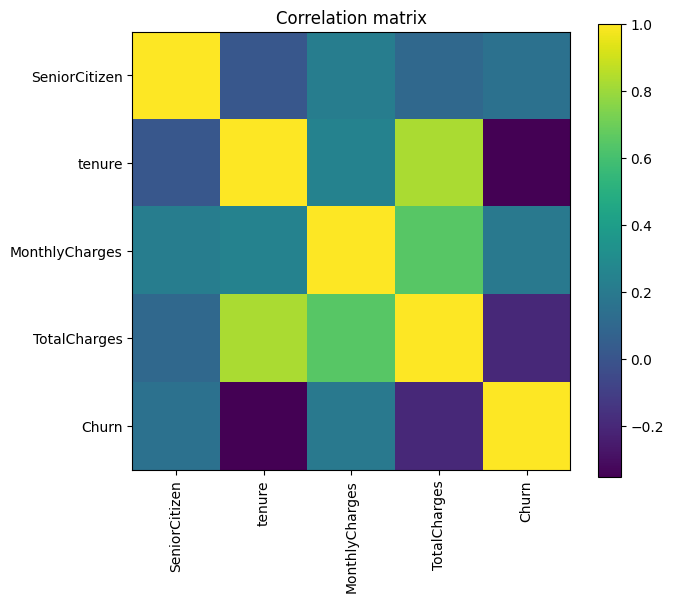

In [15]:
# Create a numeric-only view for quick correlation
numeric_df = df.select_dtypes(include=['int64','float64']).copy()
# If Churn is in {Yes,No}, add a numeric version for correlation view
if 'Churn' in df.columns and 'Churn' not in numeric_df.columns:
    numeric_df['Churn'] = df['Churn'].astype(str).str.lower().isin(['yes','1','true']).astype(int)

if numeric_df.shape[1] >= 2:
    corr = numeric_df.corr()
    plt.figure(figsize=(7,6))
    plt.imshow(corr, interpolation='nearest')
    plt.title('Correlation matrix')
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for correlation.')

## 10. Notes and next steps
- Based on this EDA, define preprocessing rules (binary encoding, one-hot for multi-category, scaling).
- Move stable logic into reusable modules (done later in your project under `src/`).
- Train and evaluate the model in a separate pipeline script and testing notebook.
